In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re

In [2]:
df=pd.read_csv("marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv")
df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [3]:
df.isnull().sum()

Uniq Id                       0
Crawl Timestamp               0
Job Title                   575
Job Salary                   50
Job Experience Required     573
Key Skills                 1271
Role Category              2305
Location                    577
Functional Area             573
Industry                    573
Role                        901
dtype: int64

The dataset has many missing values. We shall drop these missing values.

In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27005 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Uniq Id                  27005 non-null  object
 1   Crawl Timestamp          27005 non-null  object
 2   Job Title                27005 non-null  object
 3   Job Salary               27005 non-null  object
 4   Job Experience Required  27005 non-null  object
 5   Key Skills               27005 non-null  object
 6   Role Category            27005 non-null  object
 7   Location                 27005 non-null  object
 8   Functional Area          27005 non-null  object
 9   Industry                 27005 non-null  object
 10  Role                     27005 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


In [6]:
df.isnull().sum()

Uniq Id                    0
Crawl Timestamp            0
Job Title                  0
Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Location                   0
Functional Area            0
Industry                   0
Role                       0
dtype: int64

In [7]:
df.duplicated().sum()

0

Now there are no missing values or duplicate values in the dataset.

we will drop unique id and crawl timestamp column from the dataset as these columns will not add any value in analysing the dataset.

In [8]:
df=df.drop(["Uniq Id", "Crawl Timestamp"],axis=1)
df=df.reset_index(drop=True)
df.head()

,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27005 entries, 0 to 27004
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Job Title                27005 non-null  object
 1   Job Salary               27005 non-null  object
 2   Job Experience Required  27005 non-null  object
 3   Key Skills               27005 non-null  object
 4   Role Category            27005 non-null  object
 5   Location                 27005 non-null  object
 6   Functional Area          27005 non-null  object
 7   Industry                 27005 non-null  object
 8   Role                     27005 non-null  object
dtypes: object(9)
memory usage: 1.9+ MB


In [10]:
df.head()

,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


Let's explore the important variables from the dataset. We will start with exploring Key skills 

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

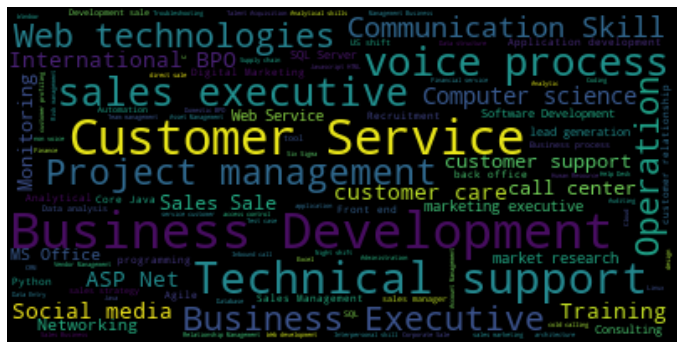

In [13]:
text=" ".join(i for i in df["Key Skills"])
stopwords=set(STOPWORDS)
wc=WordCloud(stopwords=stopwords,background_color="black").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

Now let’s have a look at the functional areas mentioned in the dataset:

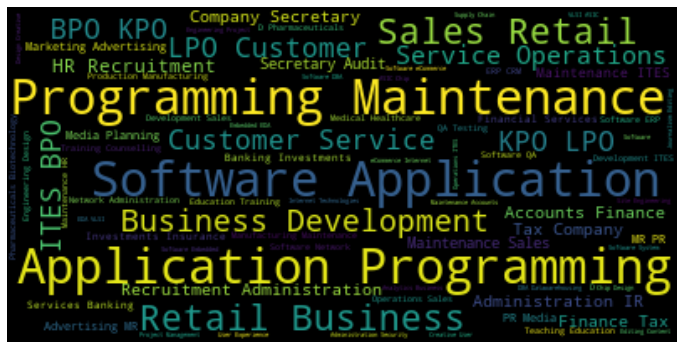

In [14]:
text=" ".join(i for i in df["Functional Area"])
stopwords=set(STOPWORDS)
wc=WordCloud(stopwords=stopwords,background_color="black").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

Now let’s have a look at the job titles mentioned in the dataset:

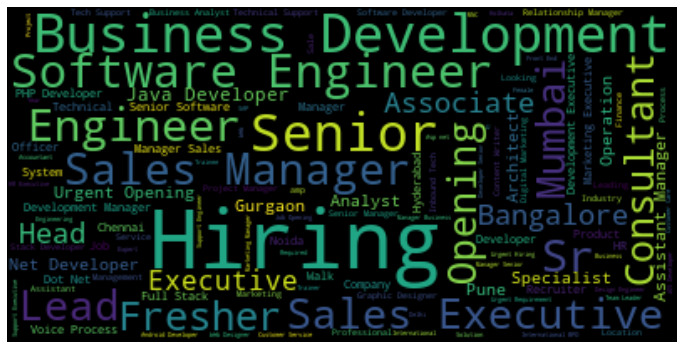

In [15]:
text=" ".join(i for i in df["Job Title"])
stopwords=set(STOPWORDS)
wc=WordCloud(stopwords=stopwords,background_color="black").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

### Creating a content based Recommendation system

Now let’s move forward by creating a job recommendation system.

The Key Skills column in the dataset contains the skills required for the job role. We can use the Key Skills column to recommend jobs to the users. So here’s how we can use the cosine similarity algorithm to create a similarity matrix from the Key Skills column:

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction import text

feature=df["Key Skills"].tolist()
tfidf=text.TfidfVectorizer(input=feature,stop_words="english")
tfidf_matrix=tfidf.fit_transform(feature)
similarity=cosine_similarity(tfidf_matrix)

Now we will set the Job title column as the index of the dataset so that the users can find similar jobs according to the job they are looking for:

In [17]:
indices = pd.Series(df.index, index=df['Role']).drop_duplicates()
indices

Role
Media Planning Executive/Manager                  0
Sales Executive/Officer                           1
R&D Executive                                     2
Technical Support Engineer                        3
Testing Engineer                                  4
                                              ...  
Software Developer                            27000
Operations Manager                            27001
Lecturer/Professor                            27002
Software Developer                            27003
Search Engine Optimisation /SEO Specialist    27004
Length: 27005, dtype: int64

In [18]:
indices["Software Developer"]

Role
Software Developer       13
Software Developer       17
Software Developer       18
Software Developer       23
Software Developer       24
                      ...  
Software Developer    26985
Software Developer    26991
Software Developer    26996
Software Developer    27000
Software Developer    27003
Length: 6250, dtype: int64

Now we will write a function to recommend jobs according to the skills required for the job role:

In [19]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    #print(similarity_scores)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return df[['Job Title', 'Job Experience Required', 
                 'Key Skills']].iloc[newsindices]

jobs_recommendation("Software Developer")

,Job Title,Job Experience Required,Key Skills
6249,Android Developer - SDK,8 - 10 yrs,Android SDK| Content Development| Application...
6248,AM Quality,4 - 5 yrs,Networking| Printing| Aerospace| Raw material...
6247,Full Stack Developer - Php/laravel Framework,2 - 5 yrs,PHP| MVC| Laravel| AWS| SDLC| Wordpress| LAMP...
6246,CIB Cash Operations Project Manager - Associate,5 - 10 yrs,Data analysis| Investment banking| Financial ...
6245,Wordpress Developer,1 - 6 yrs,Coding| Wordpress| Commerce| HTML| Troublesho...
